In [33]:
import pandas as pd

In [99]:
setups = ["fronts", "reimprove-fronts"]
indicators = ["hv"]
nobjs = [2, 3, 5, 10]
benchmarks = ["DTLZ", "WFG"]
problems = {
    "WFG": list(range(1,10)),
    "DTLZ": [2, 4, 5, 6, 7],
}
nvars = {
    2:  [30, 40, 50],
    3:  [30, 40, 50],
    5:  [30, 40, 50],
    10: [31, 41, 51],
}

In [100]:
data = [
    {
    "setup": setup,
    "indicator": indicator,
    "nobj": nobj,
    "problem": f"{bench}{problem}",
    "nvar": nvar,
    "value": pd.read_csv(f"{setup}/{bench}{problem}.{nobj}.{nvar}.{indicator}", header=None)[0][0]
    }
    for setup in setups
    for indicator in indicators[:1]
    for nobj in nobjs
    for bench in benchmarks
    for problem in problems[bench]
    for nvar in nvars[nobj]
]

In [101]:
df = pd.DataFrame(data)
df.head()

,setup,indicator,nobj,problem,nvar,value
0,fronts,hv,2,DTLZ2,30,120.214264
1,fronts,hv,2,DTLZ2,40,120.214260
2,fronts,hv,2,DTLZ2,50,120.214234
3,fronts,hv,2,DTLZ4,30,120.214334
4,fronts,hv,2,DTLZ4,40,120.214193


In [102]:
df.to_csv("fronts.csv", index=False)

In [78]:
import seaborn as sns
sns.set()

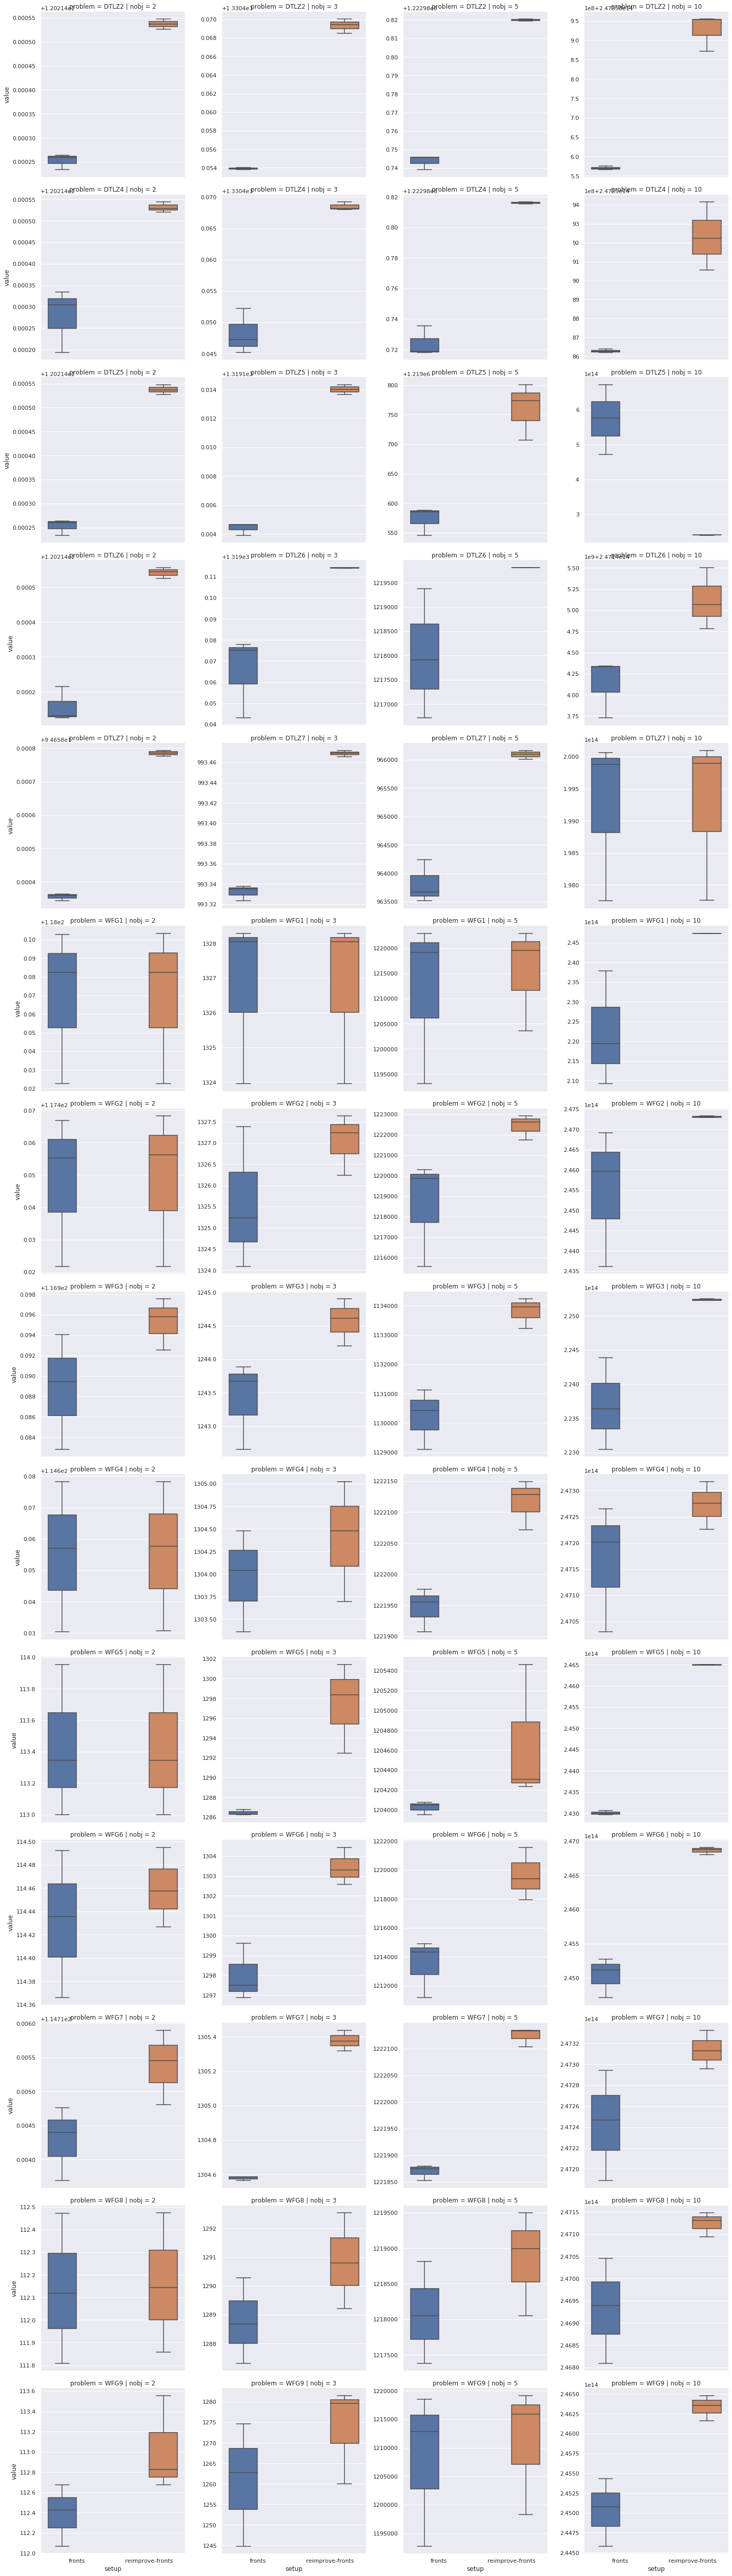

In [79]:
sns.catplot(
    data=df,
    x="setup",
    y="value",
    hue="setup",
    col="nobj",
    row="problem",
    sharey=False,
    aspect=1,
    kind="box",
)

In [80]:
df_wide = df.pivot_table(index=["indicator",'nobj','problem','nvar'], columns=["setup"], values=['value'])
df_wide.head()

value                 
setup                            fronts reimprove-fronts
indicator nobj problem nvar                             
hv        2    DTLZ2   30    120.214264       120.214547
                       40    120.214260       120.214537
                       50    120.214234       120.214527
               DTLZ4   30    120.214334       120.214544
                       40    120.214193       120.214529

In [92]:
df_rpd = (df_wide[('value', 'reimprove-fronts')] / df_wide[('value', 'fronts')] - 1).reset_index(name='value')
df_rpd

,indicator,nobj,problem,nvar,value
0,hv,2,DTLZ2,30,0.000002
1,hv,2,DTLZ2,40,0.000002
2,hv,2,DTLZ2,50,0.000002
3,hv,2,DTLZ4,30,0.000002
4,hv,2,DTLZ4,40,0.000003
...,...,...,...,...,...
163,hv,10,WFG8,41,0.000774
164,hv,10,WFG8,51,0.001153
165,hv,10,WFG9,31,0.004263
166,hv,10,WFG9,41,0.007269


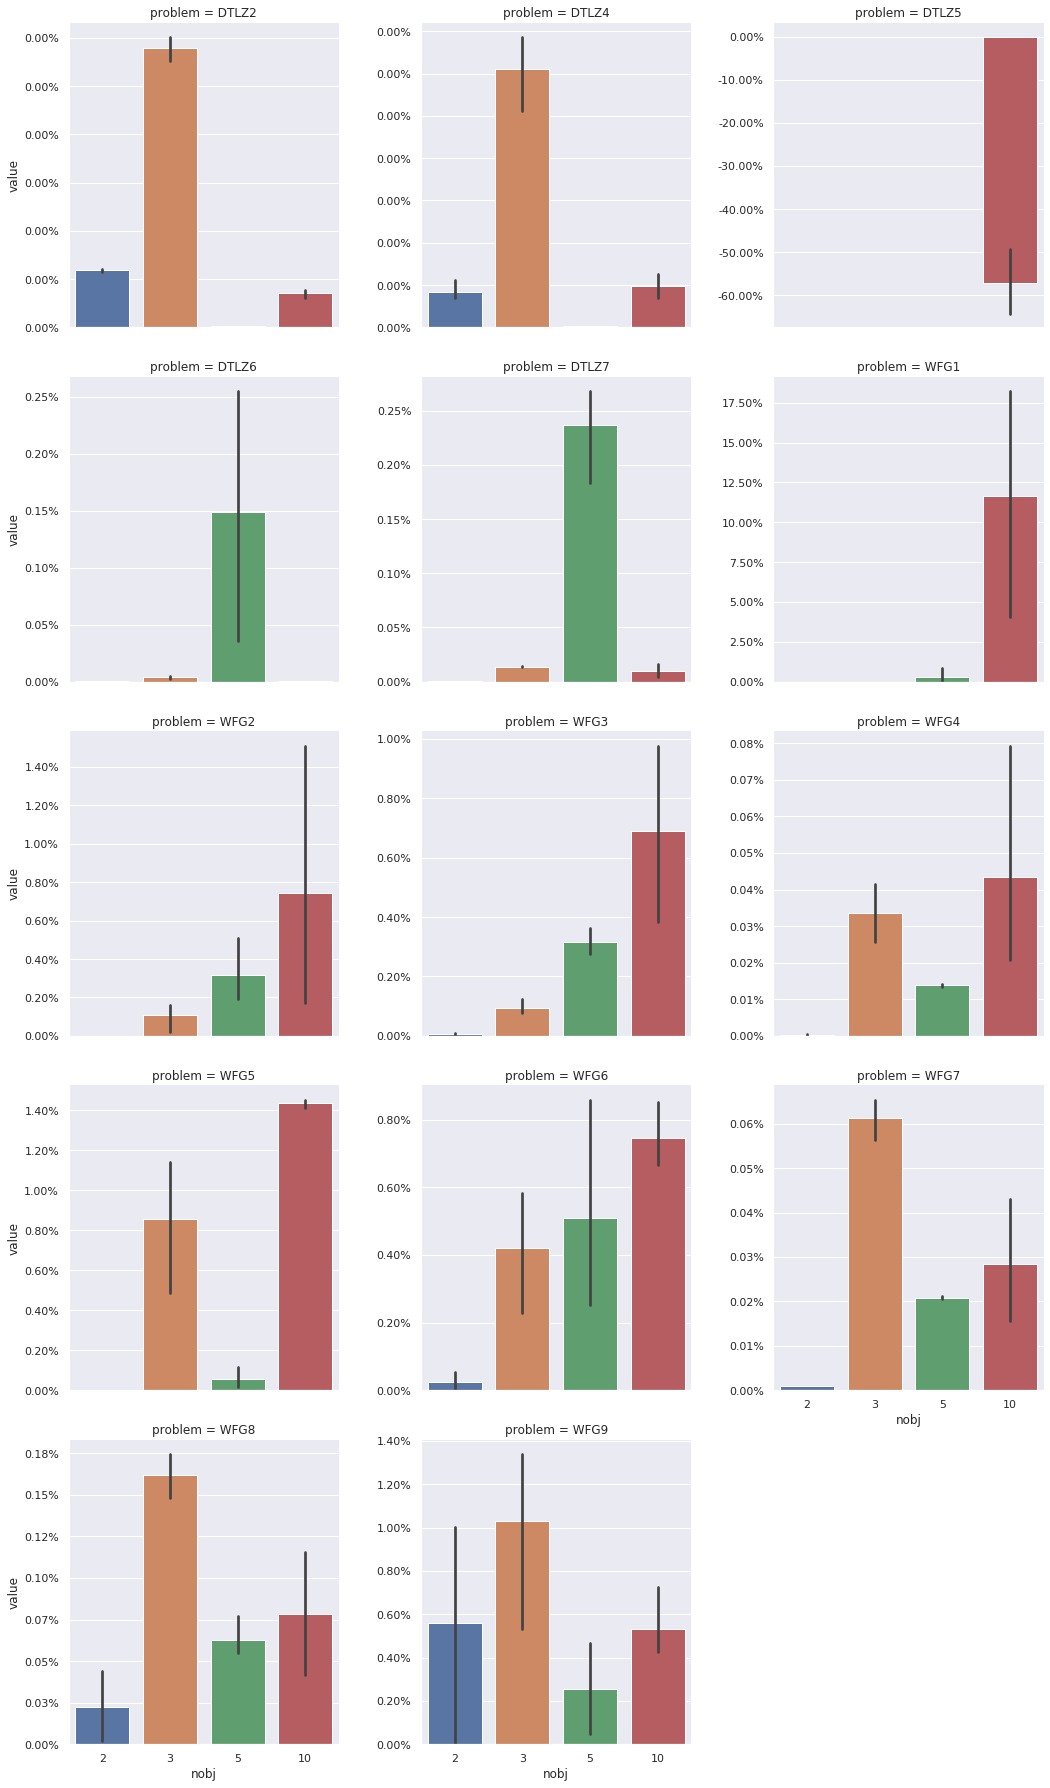

In [96]:
fig = sns.catplot(
    data=df_rpd,
    x="nobj",
    y="value",
#     hue='nvar',
    col="problem",
    col_wrap=3,
#     row="problem",
    sharey=False,
    aspect=1,
    kind="bar",
    order=[2,3,5,10]
)

from matplotlib.ticker import PercentFormatter
for sub in fig.axes.flat:
    sub.yaxis.set_major_formatter(PercentFormatter(1, decimals=2))